### 7.2 不偏推定量
#### 【趣旨】標本から母数（母平均/母分散 etc.）を推定する：demonstration
>以下の話は、母集団と標本それぞれの統計量と、その間の関係を示す最も基本となるもの。   
>しっかりとやっていることの意味を理解すること！！！  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint

In [2]:
# 0-9の乱数を20個生成（母集団(size=100)を作成）
a = randint(0,10,100)
print("母集団 =", a)
p_mean = np.mean(a)
p_var = np.var(a, ddof=0)  #ddof=0: 標本分散（nで割る）
print(f"母平均: {p_mean:5.3f} / 母分散: {p_var:5.3f}")

母集団 = [4 3 9 0 4 7 4 9 4 1 6 2 8 5 8 8 0 3 3 2 8 3 1 1 8 4 2 3 2 4 0 2 6 6 9 8 8
 3 6 9 9 7 0 8 9 4 5 1 0 5 0 9 0 8 2 6 0 7 3 0 7 9 2 9 5 8 9 0 8 4 8 1 6 2
 7 7 6 9 2 5 3 9 3 8 5 3 1 1 2 4 2 0 7 5 3 0 6 3 0 1]
母平均: 4.460 / 母分散: 9.248


In [3]:
# 標本抽出（手動で何度か実行せよ）
sample_num = 5
sample = np.random.choice(a,sample_num)
print(sample)
print("標本平均:",np.mean(sample))
print("標本分散 (1/n):",np.var(sample, ddof=0))
print("不偏分散 (1/(n-1)):",np.var(sample, ddof=1))

[8 0 8 6 2]
標本平均: 4.8
標本分散 (1/n): 10.559999999999999
不偏分散 (1/(n-1)): 13.2


In [4]:
# 標本抽出
sample_mean5=[]
sample_Uvar5=[]
sample_var5=[]

# size100の母集団から、5つランダムに取り出して標本とする操作を108回繰り返す
for k in range(108):
    sample = np.random.choice(a,5)
    s_ave = np.mean(sample)
    s_var = np.var(sample, ddof=0)   # ddof=0: 標本分散（nで割る）
    U_var = np.var(sample, ddof=1)   # ddof=1: 不偏分散（n-1で割る）
    print(f"標本:{k+1:>2} {sample}  標本平均: {s_ave:6.3f} / 不偏分散: {U_var:6.3f} / 標本分散: {s_var:6.3f}")
    sample_mean5.append(s_ave)
    sample_var5.append(s_var)
    sample_Uvar5.append(U_var)

print("-"*40)
print(f"標本平均の平均: \t {np.mean(sample_mean5):6.3f}  *母平均推定量*")
print(f"標本平均の標準偏差: \t {np.sqrt(np.var(sample_mean5)):6.3f}")
print(f"不偏分散の平均: \t {np.mean(sample_Uvar5):6.3f}  *母分散推定量*")
print(f"標本分散の平均: \t {np.mean(sample_var5):6.3f}")

標本: 1 [6 8 0 4 4]  標本平均:  4.400 / 不偏分散:  8.800 / 標本分散:  7.040
標本: 2 [1 5 3 4 8]  標本平均:  4.200 / 不偏分散:  6.700 / 標本分散:  5.360
標本: 3 [9 6 8 8 9]  標本平均:  8.000 / 不偏分散:  1.500 / 標本分散:  1.200
標本: 4 [2 2 3 8 9]  標本平均:  4.800 / 不偏分散: 11.700 / 標本分散:  9.360
標本: 5 [3 7 7 3 3]  標本平均:  4.600 / 不偏分散:  4.800 / 標本分散:  3.840
標本: 6 [6 8 1 6 3]  標本平均:  4.800 / 不偏分散:  7.700 / 標本分散:  6.160
標本: 7 [8 1 2 7 3]  標本平均:  4.200 / 不偏分散:  9.700 / 標本分散:  7.760
標本: 8 [9 6 2 7 7]  標本平均:  6.200 / 不偏分散:  6.700 / 標本分散:  5.360
標本: 9 [6 8 3 1 8]  標本平均:  5.200 / 不偏分散:  9.700 / 標本分散:  7.760
標本:10 [8 9 5 0 5]  標本平均:  5.400 / 不偏分散: 12.300 / 標本分散:  9.840
標本:11 [1 4 5 5 6]  標本平均:  4.200 / 不偏分散:  3.700 / 標本分散:  2.960
標本:12 [8 8 6 0 2]  標本平均:  4.800 / 不偏分散: 13.200 / 標本分散: 10.560
標本:13 [8 0 2 1 4]  標本平均:  3.000 / 不偏分散: 10.000 / 標本分散:  8.000
標本:14 [8 6 2 1 9]  標本平均:  5.200 / 不偏分散: 12.700 / 標本分散: 10.160
標本:15 [9 0 6 5 6]  標本平均:  5.200 / 不偏分散: 10.700 / 標本分散:  8.560
標本:16 [0 1 3 3 7]  標本平均:  2.800 / 不偏分散:  7.200 / 標本分散:  5.760
標本:17 [6

+ **標本平均に関するヒストグラムの作成・描画**

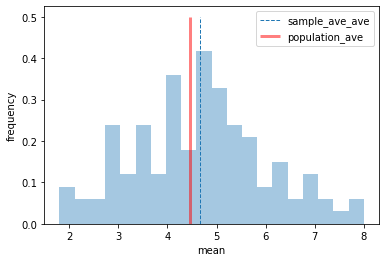

In [13]:
plt.hist(sample_mean5, bins=20, density=True, alpha=0.4) # bins(option): 棒の数を指定
plt.xlabel("mean")
plt.ylabel("frequency")

# 標本平均を示す縦線（黒破線）の描画
plt.vlines(x=np.mean(sample_mean5), ymin=0, ymax=0.5, linestyles='dashed', linewidths=1,label='sample_ave_ave')
# 母平均を示す縦線（赤実線）の描画
plt.vlines(x=p_mean, ymin=0, ymax=0.5, linestyles='solid', linewidths=3, color="r",alpha=0.5,label='population_ave')
plt.legend()

+ **標本分散と不偏分散に関するヒストグラムの作成・描画**

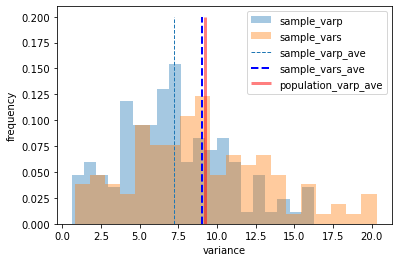

In [10]:
foo = np.vstack((sample_Uvar5,sample_var5)).T
# 標本分散のヒストグラム（薄青色）
plt.hist(foo[:,1], bins=20, density=True, alpha=0.4,label='sample_varp') # bins(option): 棒の数を指定
# 不偏分散のヒストグラム（オレンジ）
plt.hist(foo[:,0], bins=20, density=True, alpha=0.4,label='sample_vars') # bins(option): 棒の数を指定
plt.xlabel("variance")
plt.ylabel("frequency")

# 標本分散を示す縦線（黒破線）の描画
plt.vlines(x=np.mean(sample_var5), ymin=0, ymax=0.2, linestyles='dashed', linewidths=1,label='sample_varp_ave')
# 不偏分散を示す縦線（青破線）の描画
plt.vlines(x=np.mean(sample_Uvar5), ymin=0, ymax=0.2, linestyles='dashed', linewidths=2, color="b",label='sample_vars_ave')
# 母分散を示す縦線（赤実線）の描画
plt.vlines(x=p_var, ymin=0, ymax=0.2, linestyles='solid', linewidths=3, color="r",alpha=0.5,label='population_varp_ave');
plt.legend()

## 標本数20

In [11]:
# 標本抽出（手動で何度か実行せよ）
sample_num = 20
sample = np.random.choice(a,sample_num)
print(sample)
print("標本平均:",np.mean(sample))
print("標本分散 (1/n):",np.var(sample, ddof=0))
print("不偏分散 (1/(n-1)):",np.var(sample, ddof=1))

[0 6 0 3 9 0 3 7 2 5 8 5 4 8 3 1 9 9 2 5]
標本平均: 4.45
標本分散 (1/n): 9.3475
不偏分散 (1/(n-1)): 9.839473684210526


In [12]:
# 標本抽出
sample_mean20=[]
sample_Uvar20=[]
sample_var20=[]

# size100の母集団から、5つランダムに取り出して標本とする操作を108回繰り返す
for k in range(108):
    sample = np.random.choice(a,20)
    s_ave = np.mean(sample)
    s_var = np.var(sample, ddof=0)   # ddof=0: 標本分散（nで割る）
    U_var = np.var(sample, ddof=1)   # ddof=1: 不偏分散（n-1で割る）
    print(f"標本:{k+1:>2} {sample}  標本平均: {s_ave:6.3f} / 不偏分散: {U_var:6.3f} / 標本分散: {s_var:6.3f}")
    sample_mean20.append(s_ave)
    sample_var20.append(s_var)
    sample_Uvar20.append(U_var)

print("-"*40)
print(f"標本平均の平均: \t {np.mean(sample_mean20):6.3f}  *母平均推定量*")
print(f"標本平均の標準偏差: \t {np.sqrt(np.var(sample_mean20)):6.3f}")
print(f"不偏分散の平均: \t {np.mean(sample_Uvar20):6.3f}  *母分散推定量*")
print(f"標本分散の平均: \t {np.mean(sample_var20):6.3f}")

標本: 1 [8 0 8 5 8 2 3 9 4 5 8 8 0 4 7 6 0 1 0 7]  標本平均:  4.650 / 不偏分散: 10.450 / 標本分散:  9.927
標本: 2 [6 5 0 9 9 9 5 2 2 2 0 5 5 0 2 7 9 2 4 9]  標本平均:  4.600 / 不偏分散: 10.674 / 標本分散: 10.140
標本: 3 [7 5 6 8 8 4 6 9 4 4 8 9 0 5 0 9 3 6 6 9]  標本平均:  5.800 / 不偏分散:  7.537 / 標本分散:  7.160
標本: 4 [8 9 9 3 6 6 3 8 8 8 1 0 0 2 5 3 3 0 0 9]  標本平均:  4.550 / 不偏分散: 11.734 / 標本分散: 11.147
標本: 5 [6 2 9 0 1 4 3 4 1 2 6 6 1 9 2 2 3 6 0 8]  標本平均:  3.750 / 不偏分散:  8.303 / 標本分散:  7.888
標本: 6 [7 9 3 7 6 9 6 1 2 0 2 4 7 8 3 7 7 8 4 0]  標本平均:  5.000 / 不偏分散:  8.737 / 標本分散:  8.300
標本: 7 [8 8 0 8 0 0 5 4 7 6 2 3 1 8 9 5 9 2 9 0]  標本平均:  4.700 / 不偏分散: 11.905 / 標本分散: 11.310
標本: 8 [3 0 8 3 6 1 0 7 4 3 9 0 2 7 3 0 3 0 0 4]  標本平均:  3.150 / 不偏分散:  8.555 / 標本分散:  8.127
標本: 9 [8 9 9 0 3 8 0 1 0 1 5 9 8 4 4 8 2 8 0 8]  標本平均:  4.750 / 不偏分散: 13.039 / 標本分散: 12.387
標本:10 [6 7 4 4 4 7 8 3 9 8 4 9 8 8 2 7 5 6 5 3]  標本平均:  5.850 / 不偏分散:  4.661 / 標本分散:  4.428
標本:11 [2 9 8 0 3 2 3 9 0 0 1 7 5 0 2 3 4 4 0 1]  標本平均:  3.150 / 不偏分散:  9.187 / 標

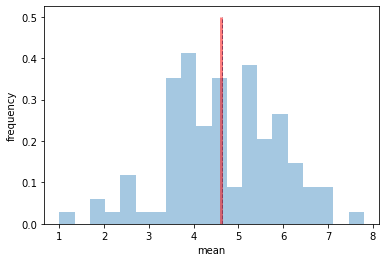

In [51]:
plt.hist(sample_mean20, bins=20, density=True, alpha=0.4) # bins(option): 棒の数を指定
plt.xlabel("mean")
plt.ylabel("frequency")

# 標本平均を示す縦線（黒破線）の描画
plt.vlines(x=np.mean(sample_mean20), ymin=0, ymax=0.5, linestyles='dashed', linewidths=1,label='sample_ave_ave')
# 母平均を示す縦線（赤実線）の描画
plt.vlines(x=p_mean, ymin=0, ymax=0.5, linestyles='solid', linewidths=3, color="r",alpha=0.5,label='population_ave');

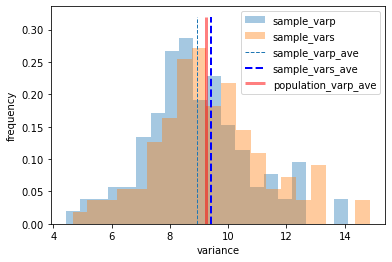

In [18]:
foo = np.vstack((sample_Uvar20,sample_var20)).T
# 標本分散のヒストグラム（薄青色）
plt.hist(foo[:,1], bins=20, density=True, alpha=0.4,label='sample_varp') # bins(option): 棒の数を指定
# 不偏分散のヒストグラム（オレンジ）
plt.hist(foo[:,0], bins=20, density=True, alpha=0.4,label='sample_vars') # bins(option): 棒の数を指定
plt.xlabel("variance")
plt.ylabel("frequency")

# 標本分散を示す縦線（黒破線）の描画
plt.vlines(x=np.mean(sample_var20), ymin=0, ymax=0.32, linestyles='dashed', linewidths=1,label='sample_varp_ave')
# 不偏分散を示す縦線（青破線）の描画
plt.vlines(x=np.mean(sample_Uvar20), ymin=0, ymax=0.32, linestyles='dashed', linewidths=2, color="b",label='sample_vars_ave')
# 母分散を示す縦線（赤実線）の描画
plt.vlines(x=p_var, ymin=0, ymax=0.32, linestyles='solid', linewidths=3, color="r",alpha=0.5,label='population_varp_ave')
plt.legend()